# Airline Pessanger Sentiment Prediction 

## Import Package

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd
import itertools

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Import Statistics package
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression

# Import metrics package
from sklearn import metrics
from sklearn.metrics import average_precision_score

## **1. Load Data**
---

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
# Import dataset from csv file
data = pd.read_csv('../dataset/Air_Passenger_Dataset.csv')

# Table check
data.head().T

,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3
Ease of Online booking,3,3,2,5,3


Check the data shape.
- How many variables are there?

In [3]:
# Check the data shape
data.shape

(129880, 24)

  - Our sample contains 24 variables from 129,880 observations.
    - 1 response variable, `satisfaction`,
    - 1 column `ID`,
    - and 22 potential predictors.

Check for the duplicate respondents in our sample using column `id`.

In [4]:
# Find the sum/total of duplicated respondents' IDs.
data['id'].duplicated().sum()

np.int64(0)

Great, we don't have duplicate ID in the sample.

We can drop the `id` column.

In [5]:
# Drop column ID
data = data.drop(columns=['id'], axis=1)

# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

Check the proportion of response variable first to decide the splitting strategy.

In [6]:
# Define response variable
response_variable = 'satisfaction'

# Check the proportion of response variable
data[response_variable].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: proportion, dtype: float64

## **2. Sample Splitting**
---

First, define the predictors (X) and the response (y).

In [7]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns=[response_variable], axis=1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (129880,)
X shape : (129880, 22)


Next, split the training and testing set from each predictors (X) and response (y).
- Set `stratify = y` for splitting the sample with stratify, based on the proportion of response y.
- Set `test_size = 0.3` for holding 30% of the sample as a testing set.
- Set `random_state = 42` for reproducibility.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (90916, 22)
y train shape : (90916,)
X test shape  : (38964, 22)
y test shape  : (38964,)


Check the proportion of response y in each training and testing set.

In [9]:
y_train.value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565533
satisfied                  0.434467
Name: proportion, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565548
satisfied                  0.434452
Name: proportion, dtype: float64

## **3. Exploratory Data Analysis**
---

- To make a model that predicts well on unseen data, we must prevent leakage of test set information.
- Thus, we only explore on **training set**.

In [11]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train), axis=1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head().T

Train data shape: (90916, 23)


,27875,38437,120302,46094,56431
Gender,Male,Female,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,40,29,45,52,53
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Business,Business,Business,Business,Business
Flight Distance,3292,2389,1276,2150,3310
Inflight wifi service,5,5,2,5,1
Departure/Arrival time convenient,5,4,2,5,1
Ease of Online booking,5,5,2,5,1
Gate location,5,5,3,5,1


What do we do in EDA?
- Check for any insight in the data:
  - Distribution or proportion
  - Outliers
  - Sparse data
  - Perfect discrimination
- Make a plan for data pre-processing.

### Check for Missing Values

---

**Summary**
- There are big number of missing values in `Arrival Delay in Minutes`.
  - `Arrival Delay in Minutes` is float variable.
- We need to find how to handle the missing values by exploring those variables.

### Predictor 1: gender

---
Gender of the respondent: male or female.

In [12]:
# Describe proportion of 'gender'
data_train['Gender'].value_counts(normalize=True)

Gender
Female    0.507358
Male      0.492642
Name: proportion, dtype: float64

From here, we know:
- Gender (female and male) of our sample is quite balanced, in a ratio of 51:49.

In [13]:
data_train['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.565533
satisfied                  0.434467
Name: proportion, dtype: float64

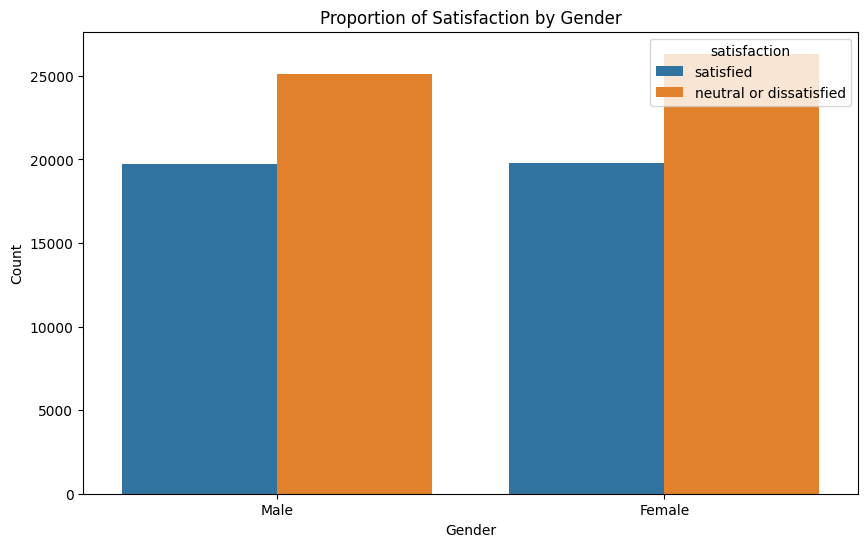

In [14]:
# Describe proportion of satifaction by gender
data_train.groupby('Gender')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Gender', hue='satisfaction')
plt.title('Proportion of Satisfaction by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

In [15]:
# Create a function of independence test
def independence_test(predictor_label, alpha=0.05):
    """
    Funtion to perform the independence test.

    Parameters
    ----------
    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data_train[predictor_label],
                           data_train[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Satisfaction and {predictor_label} is not independent with P-val={pval:.2f}.")
    else:
        print(f"Satisfaction and {predictor_label} is independent with P-val={pval:.2f}.")

In [16]:
# Perform the independence test
independence_test('Gender')

Satisfaction and Gender is not independent with P-val=0.00.


**Summary**
- The probability of Satisfaction and gender is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `gender` variable.

### Predictor 2: customer_type
---
Customer type of the respondent.

In [17]:
# Descriptive statistics of age
data_train['Customer Type'].describe()

count              90916
unique                 2
top       Loyal Customer
freq               74227
Name: Customer Type, dtype: object

- The mode of the customer type is Loyal Customer

In [18]:
# Describe proportion of 'Customer Type'
data_train['Customer Type'].value_counts(normalize=True)

Customer Type
Loyal Customer       0.816435
disloyal Customer    0.183565
Name: proportion, dtype: float64

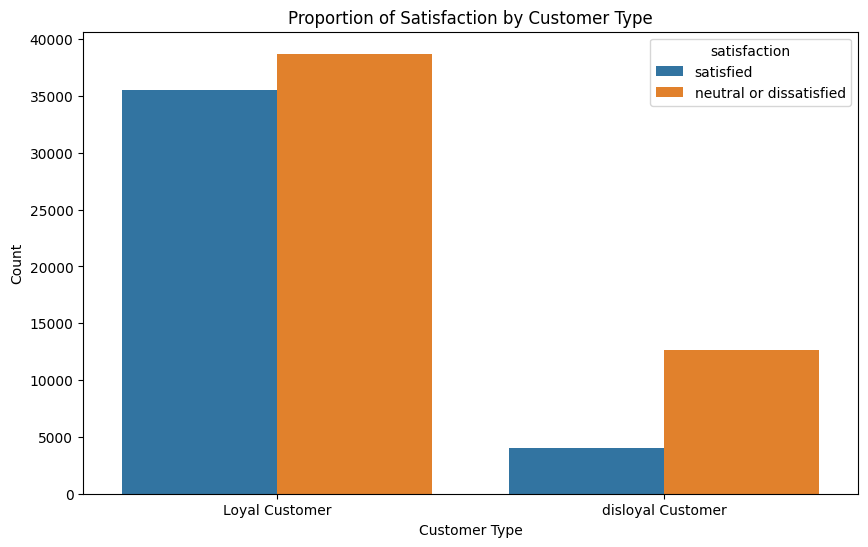

In [19]:
# Describe proportion of satifaction by gender
data_train.groupby('Customer Type')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Customer Type', hue='satisfaction')
plt.title('Proportion of Satisfaction by Customer Type')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.show()

From here, we know:
- Only about 18% of sample has a history of disloyal customer.

In [20]:
# Perform the independence test
independence_test('Customer Type')

Satisfaction and Customer Type is not independent with P-val=0.00.


**Summary**
- The probability of Satisfaction and Customer Type is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Customer Type` variable.

### Predictor 3: Age
---
Age of the respondent.

In [21]:
# Descriptive statistics of age
data_train['Age'].describe()

count    90916.000000
mean        39.412403
std         15.124316
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

- We have child respondents.
- Half of our respondents are older than 40, with a maximum age of 85.

<Axes: xlabel='Age', ylabel='Count'>

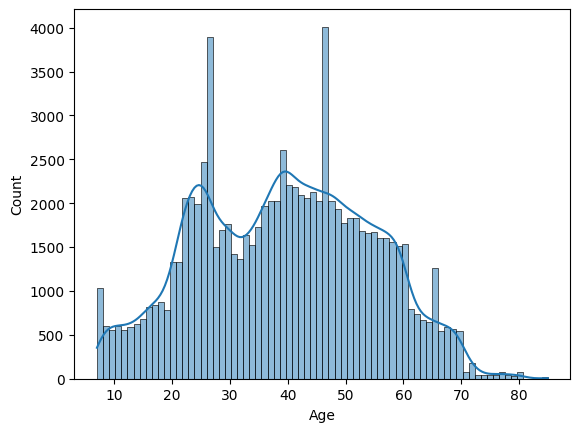

In [22]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'Age',
             kde = True)

In [23]:
# Descriptive of age by response stroke
data_train['Age'].groupby(data_train['satisfaction']).describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,51416.0,37.621344,16.469888,7.0,25.0,36.0,50.0,85.0
satisfied,39500.0,41.743772,12.798526,7.0,32.0,43.0,51.0,85.0


<Axes: xlabel='satisfaction', ylabel='Age'>

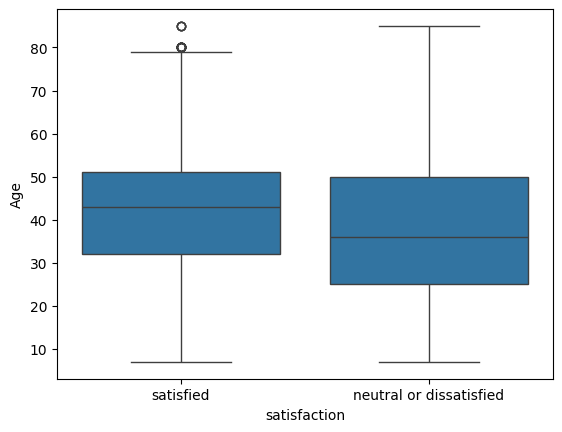

In [24]:
# Boxplot of age by response stroke
sns.boxplot(data = data_train,
            x = 'satisfaction',
            y = 'Age')

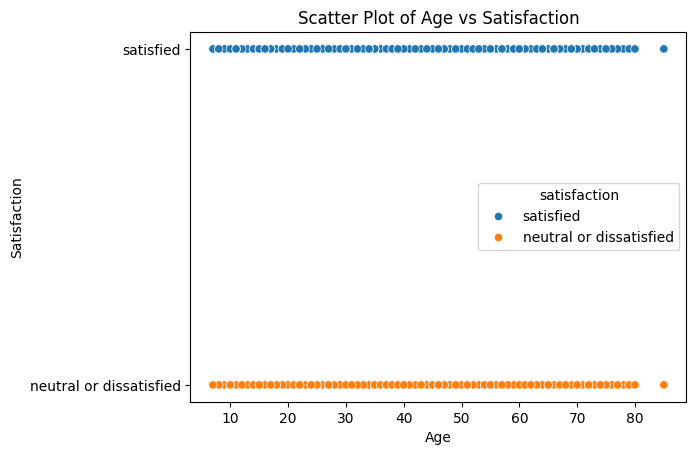

In [25]:
# Check for the perfect separation
sns.scatterplot(data=data_train,
                x='Age',
                y='satisfaction',
                hue='satisfaction')
plt.title('Scatter Plot of Age vs Satisfaction')
plt.xlabel('Age')
plt.ylabel('Satisfaction')
plt.show()

**Pre-processing Plan:**
- We don't have missing values and perfect separation from `age` variable.

### Predictor 4:  Type of Travel

---
Whether a respondent has a history of:
- 'Business travel'
- `Personal Travel'

In [26]:
data_train['Type of Travel'].value_counts(normalize=True)

Type of Travel
Business travel    0.69133
Personal Travel    0.30867
Name: proportion, dtype: float64

From here, we know:
- Only about 31% of sample has a personal travel.

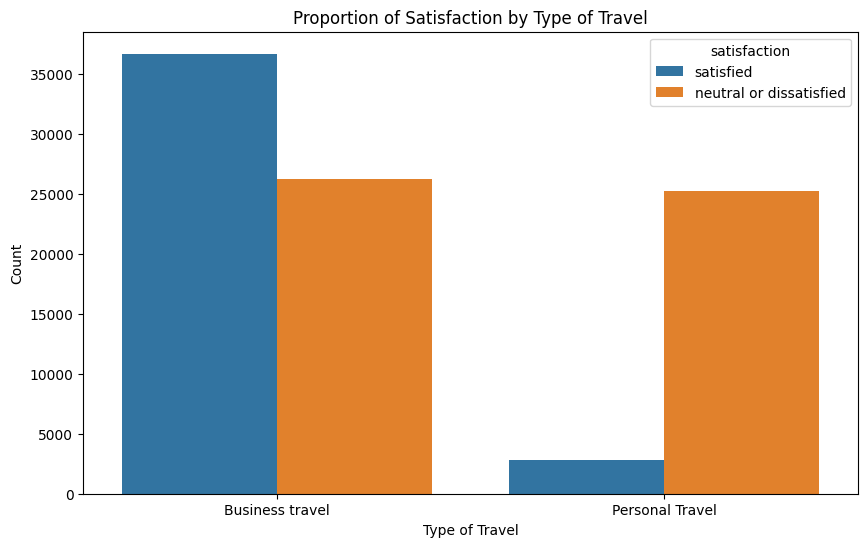

In [27]:
# Describe proportion of satifaction by gender
data_train.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Type of Travel', hue='satisfaction')
plt.title('Proportion of Satisfaction by Type of Travel')
plt.ylabel('Count')
plt.xlabel('Type of Travel')
plt.show()

In [28]:
# Perform the independence test
independence_test('Type of Travel')

Satisfaction and Type of Travel is not independent with P-val=0.00.


**Summary**
- The probability of saisfaction and Type of Travel is not independent.
- Persoal travel tend to dissatisfied than business travel

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Type of Travel` variable.

### Predictor 4:  Class

---
Whether a respondent has a history of:
- 'Business'
- `Eco'
- `Eco plus`

In [29]:
data_train['Class'].value_counts(normalize=True)

Class
Business    0.478761
Eco         0.448700
Eco Plus    0.072539
Name: proportion, dtype: float64

From here, we know:
- Only about 7% of sample is Eco Plus.

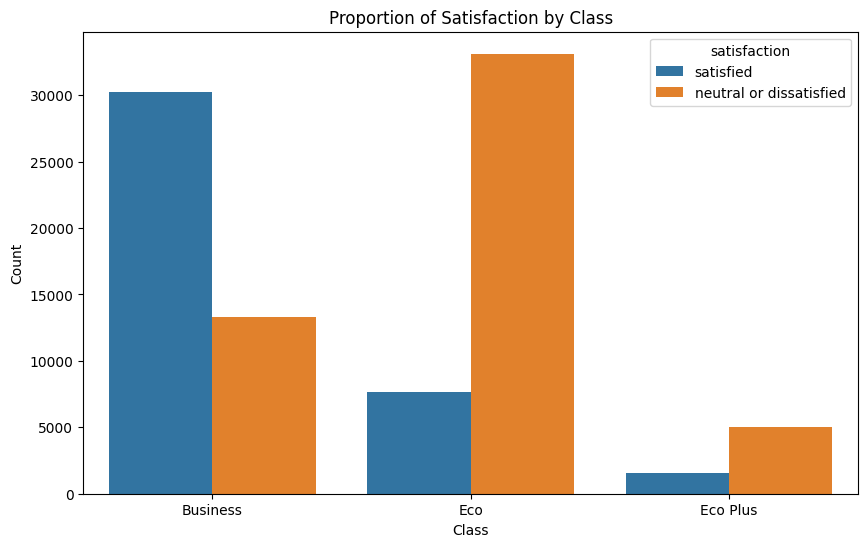

In [30]:
# Describe proportion of satifaction by gender
data_train.groupby('Class')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Class')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Class', hue='satisfaction')
plt.title('Proportion of Satisfaction by Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [31]:
# Perform the independence test
independence_test('Class')

Satisfaction and Class is not independent with P-val=0.00.


**Summary**
- The probability of satisfaction and Class is not independent.
- Customer in  eco class and eco plus tend to not satisfied

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Class` variable.

### Predictor 5:  Flight Distance

---
The feature of Flight Distance

In [32]:
# Descriptive statistics of age
data_train['Flight Distance'].describe()

count    90916.000000
mean      1191.790565
std        998.312775
min         31.000000
25%        414.000000
50%        845.000000
75%       1744.000000
max       4983.000000
Name: Flight Distance, dtype: float64

- The minumum distance is 31 and maximum is 4983
- The mea distance is 845

<Axes: xlabel='Flight Distance', ylabel='Count'>

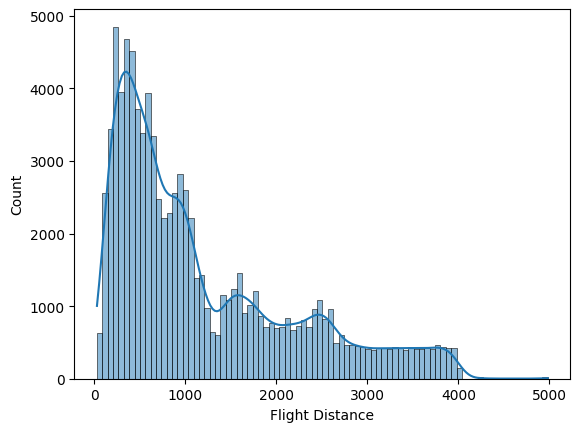

In [33]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'Flight Distance',
             kde = True)

In [34]:
# Descriptive of age by response stroke
data_train['Flight Distance'].groupby(data_train['satisfaction']).describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,51416.0,929.529252,792.272866,31.0,372.0,672.0,1145.0,4983.0
satisfied,39500.0,1533.168481,1127.302224,31.0,528.0,1262.0,2413.0,4983.0


<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

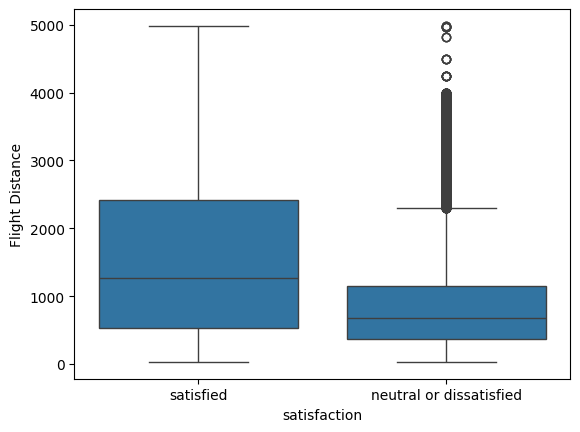

In [35]:
# Boxplot of age by response stroke
sns.boxplot(data = data_train,
            x = 'satisfaction',
            y = 'Flight Distance')

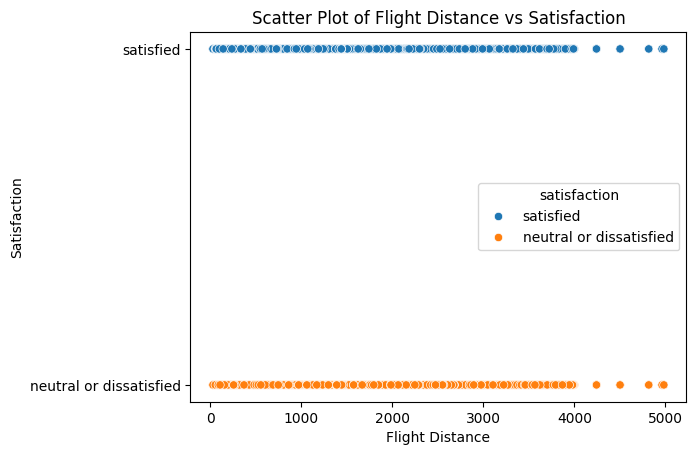

In [36]:
# Check for the perfect separation
sns.scatterplot(data=data_train,
                x='Flight Distance',
                y='satisfaction',
                hue='satisfaction')
plt.title('Scatter Plot of Flight Distance vs Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.show()

In [37]:
# Perform the independence test
independence_test('Flight Distance')

Satisfaction and Flight Distance is not independent with P-val=0.00.


**Summary**
- The probability of satisfaction and Flight Distance is not independent.
- More longer distance is more satisfied the pessenger

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Flight Distance` variable.

### Predictor 6:  Inflight wifi service

---
The feature of Inflight wifi service - Satisfaction level of the inflight wifi service

In [38]:
# Describe proportion of 'data_train.info()'
data_train['Inflight wifi service'].value_counts(normalize=True)

Inflight wifi service
2    0.249406
3    0.247701
4    0.190385
1    0.171521
5    0.111081
0    0.029907
Name: proportion, dtype: float64

From here, we know:
- Only about 17% of sample is Dissatisfied.

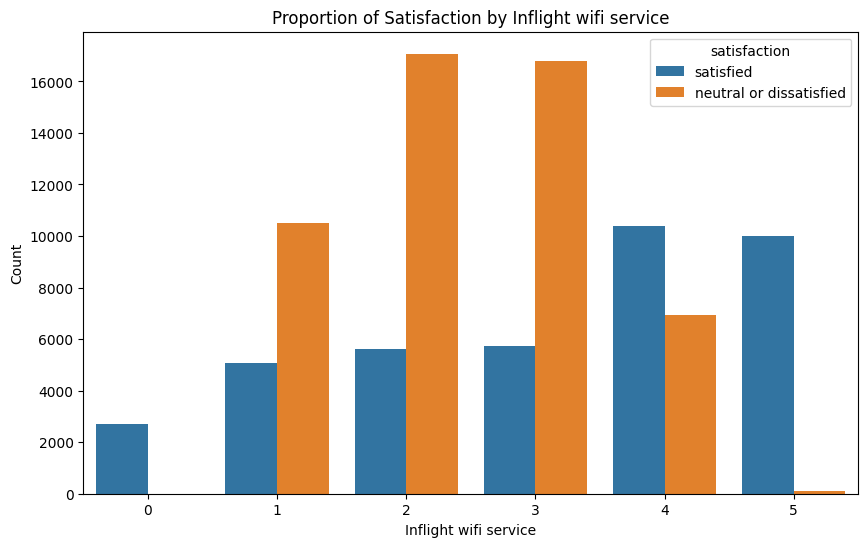

In [39]:
# Describe proportion of satifaction by gender
data_train.groupby('Inflight wifi service')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Inflight wifi service')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Inflight wifi service', hue='satisfaction')
plt.title('Proportion of Satisfaction by Inflight wifi service')
plt.ylabel('Count')
plt.xlabel('Inflight wifi service')
plt.show()

In [40]:
# Perform the independence test
independence_test('Inflight wifi service')

Satisfaction and Inflight wifi service is not independent with P-val=0.00.


**Summary**
- The probability of satisfaction and Inflight wifi service is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Inflight wifi service` variable.

### Predictor 7:  Departure/Arrival time convenient

---
The feature of Departure/Arrival time convenient

In [41]:
# Describe proportion of 'data_train.info()'
data_train['Departure/Arrival time convenient'].value_counts(normalize=True)

Departure/Arrival time convenient
4    0.246590
5    0.215474
3    0.171444
2    0.167077
1    0.148500
0    0.050915
Name: proportion, dtype: float64

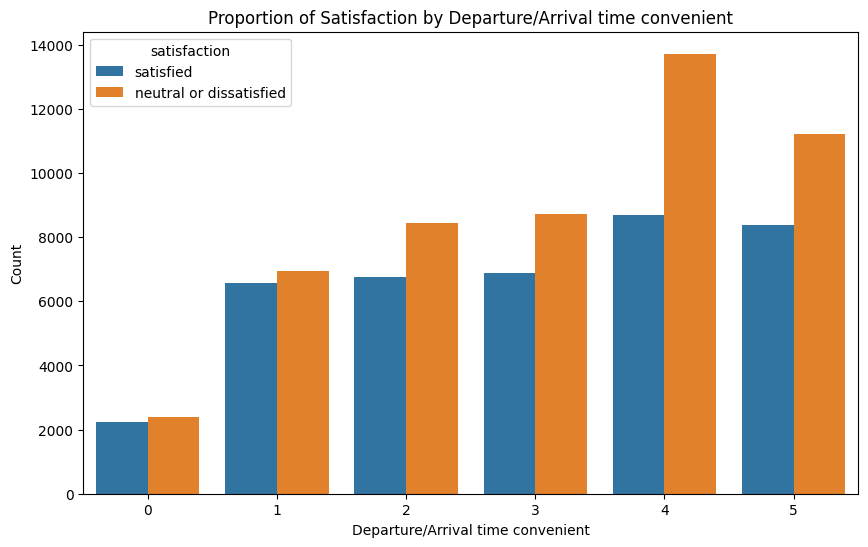

In [42]:
# Describe proportion of satifaction by gender
data_train.groupby('Departure/Arrival time convenient')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Departure/Arrival time convenient')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Departure/Arrival time convenient', hue='satisfaction')
plt.title('Proportion of Satisfaction by Departure/Arrival time convenient')
plt.ylabel('Count')
plt.xlabel('Departure/Arrival time convenient')
plt.show()

In [43]:
# Perform the independence test
independence_test('Departure/Arrival time convenient')

Satisfaction and Departure/Arrival time convenient is not independent with P-val=0.00.


### Predictor 8:  Ease of Online booking

---
The feature of Ease of Online booking

In [44]:
# Describe proportion of 'data_train.info()'
data_train['Ease of Online booking'].value_counts(normalize=True)

Ease of Online booking
3    0.233457
2    0.232555
4    0.187932
1    0.167781
5    0.134872
0    0.043403
Name: proportion, dtype: float64

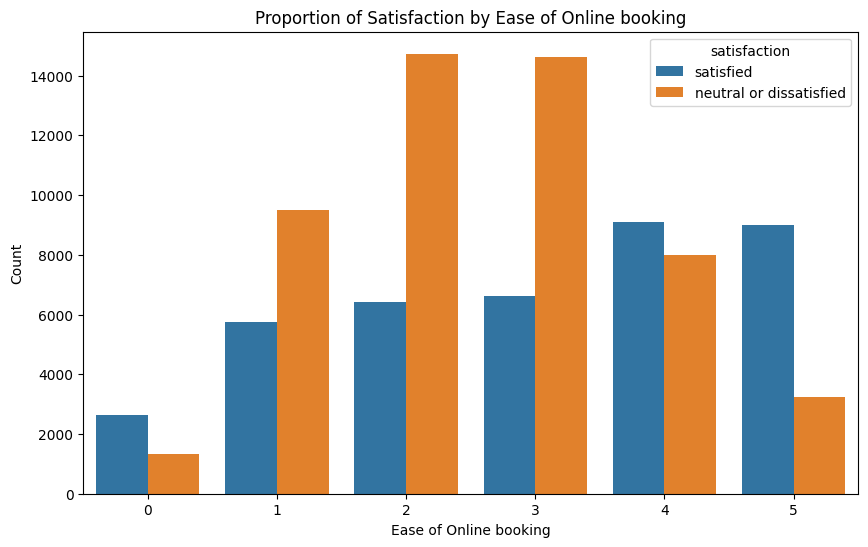

In [45]:
# Describe proportion of satifaction by gender
data_train.groupby('Ease of Online booking')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Ease of Online booking')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Ease of Online booking', hue='satisfaction')
plt.title('Proportion of Satisfaction by Ease of Online booking')
plt.ylabel('Count')
plt.xlabel('Ease of Online booking')
plt.show()

In [46]:
# Perform the independence test
independence_test('Departure/Arrival time convenient')

Satisfaction and Departure/Arrival time convenient is not independent with P-val=0.00.


### Predictor 9:  Ease of Online booking

---
The feature of Ease of Online booking

In [47]:
# Describe proportion of 'data_train.info()'
data_train['Gate location'].value_counts(normalize=True)

Gate location
3    0.274616
4    0.235668
2    0.187503
1    0.167495
5    0.134707
0    0.000011
Name: proportion, dtype: float64

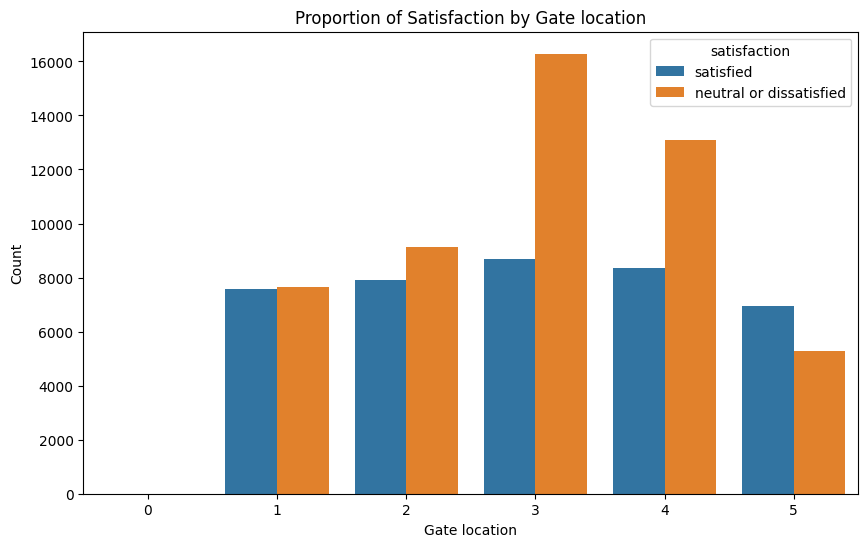

In [48]:
# Describe proportion of satifaction by gender
data_train.groupby('Gate location')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Gate location')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Gate location', hue='satisfaction')
plt.title('Proportion of Satisfaction by Gate location')
plt.ylabel('Count')
plt.xlabel('Gate location')
plt.show()

In [49]:
# Perform the independence test
independence_test('Gate location')

Satisfaction and Gate location is not independent with P-val=0.00.


### Predictor 10:  Food and drink

---
The feature of Food and drink

In [50]:
# Describe proportion of 'data_train.info()'
data_train['Food and drink'].value_counts(normalize=True)

Food and drink
4    0.235052
5    0.215298
3    0.213912
2    0.210997
1    0.123719
0    0.001023
Name: proportion, dtype: float64

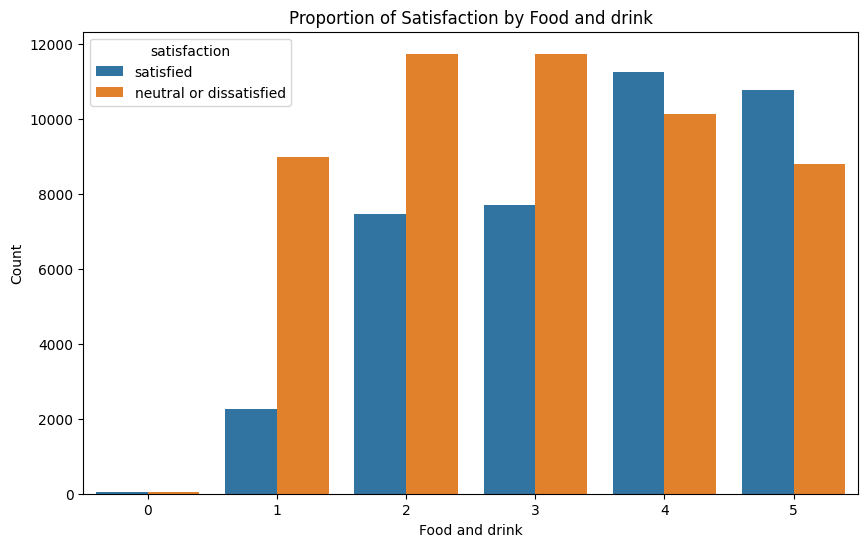

In [51]:
# Describe proportion of satifaction by gender
data_train.groupby('Food and drink')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Food and drink')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Food and drink', hue='satisfaction')
plt.title('Proportion of Satisfaction by Food and drink')
plt.ylabel('Count')
plt.xlabel('Food and drink')
plt.show()

In [52]:
# Perform the independence test
independence_test('Food and drink')

Satisfaction and Food and drink is not independent with P-val=0.00.


### Predictor 11:  Online boarding

---
The feature of Online boarding

In [53]:
# Describe proportion of 'data_train.info()'
data_train['Online boarding'].value_counts(normalize=True)

Online boarding
4    0.296328
3    0.208995
5    0.199844
2    0.169244
1    0.101918
0    0.023670
Name: proportion, dtype: float64

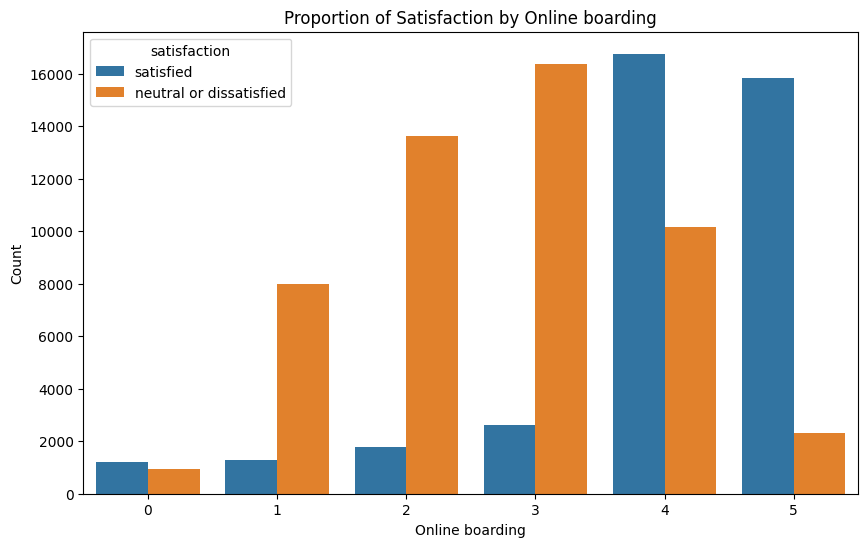

In [54]:
# Describe proportion of satifaction by gender
data_train.groupby('Online boarding')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Online boarding')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Online boarding', hue='satisfaction')
plt.title('Proportion of Satisfaction by Online boarding')
plt.ylabel('Count')
plt.xlabel('Online boarding')
plt.show()

In [55]:
# Perform the independence test
independence_test('Online boarding')

Satisfaction and Online boarding is not independent with P-val=0.00.


### Predictor 12:  Seat comfort

---
The feature of Seat comfort

In [56]:
# Describe proportion of 'data_train.info()'
data_train['Seat comfort'].value_counts(normalize=True)

Seat comfort
4    0.306140
5    0.255126
3    0.180111
2    0.142417
1    0.116206
Name: proportion, dtype: float64

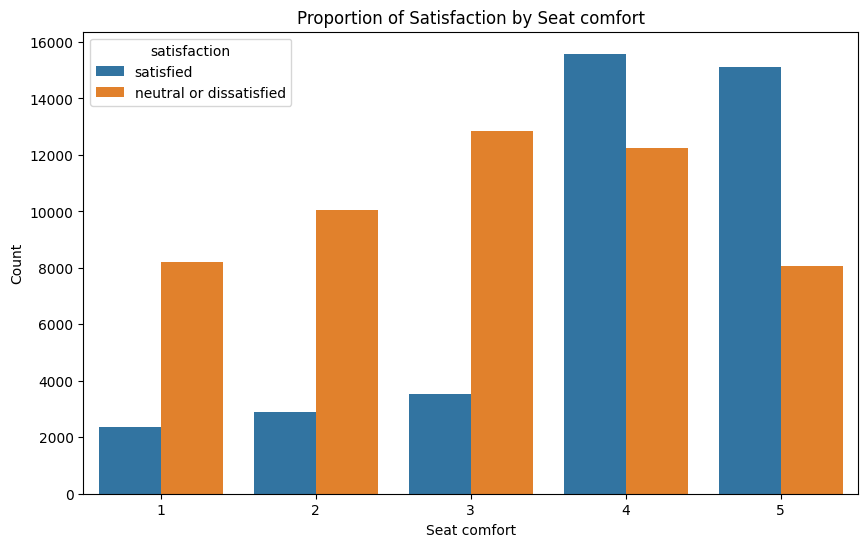

In [57]:
# Describe proportion of satifaction by gender
data_train.groupby('Seat comfort')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Seat comfort')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Seat comfort', hue='satisfaction')
plt.title('Proportion of Satisfaction by Seat comfort')
plt.ylabel('Count')
plt.xlabel('Seat comfort')
plt.show()

In [58]:
# Perform the independence test
independence_test('Seat comfort')

Satisfaction and Seat comfort is not independent with P-val=0.00.


In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90916 entries, 27875 to 15659
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             90916 non-null  object 
 1   Customer Type                      90916 non-null  object 
 2   Age                                90916 non-null  int64  
 3   Type of Travel                     90916 non-null  object 
 4   Class                              90916 non-null  object 
 5   Flight Distance                    90916 non-null  int64  
 6   Inflight wifi service              90916 non-null  int64  
 7   Departure/Arrival time convenient  90916 non-null  int64  
 8   Ease of Online booking             90916 non-null  int64  
 9   Gate location                      90916 non-null  int64  
 10  Food and drink                     90916 non-null  int64  
 11  Online boarding                    90916 non-null  int6

### Predictor 13:  Inflight entertainment
---
The feature of Inflight entertainment

In [60]:
# Describe proportion of 'data_train.info()'
data_train['Inflight entertainment'].value_counts(normalize=True)

Inflight entertainment
4    0.282909
5    0.243664
3    0.183708
2    0.169101
1    0.120474
0    0.000143
Name: proportion, dtype: float64

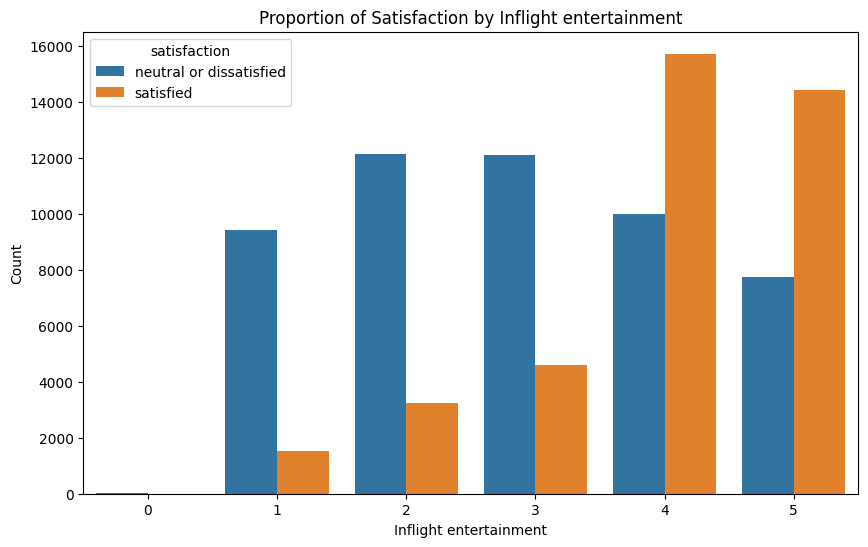

In [61]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Inflight entertainment')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Inflight entertainment')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Inflight entertainment', hue='satisfaction')
plt.title('Proportion of Satisfaction by Inflight entertainment')
plt.ylabel('Count')
plt.xlabel('Inflight entertainment')
plt.show()

In [62]:
# Perform the independence test
independence_test('Inflight entertainment')

Satisfaction and Inflight entertainment is not independent with P-val=0.00.


### Predictor 14:  On-board service
---
The feature of On-board service

In [63]:
# Describe proportion of 'data_train.info()'
data_train['On-board service'].value_counts(normalize=True)

On-board service
4    0.297758
5    0.227936
3    0.218905
2    0.141735
1    0.113643
0    0.000022
Name: proportion, dtype: float64

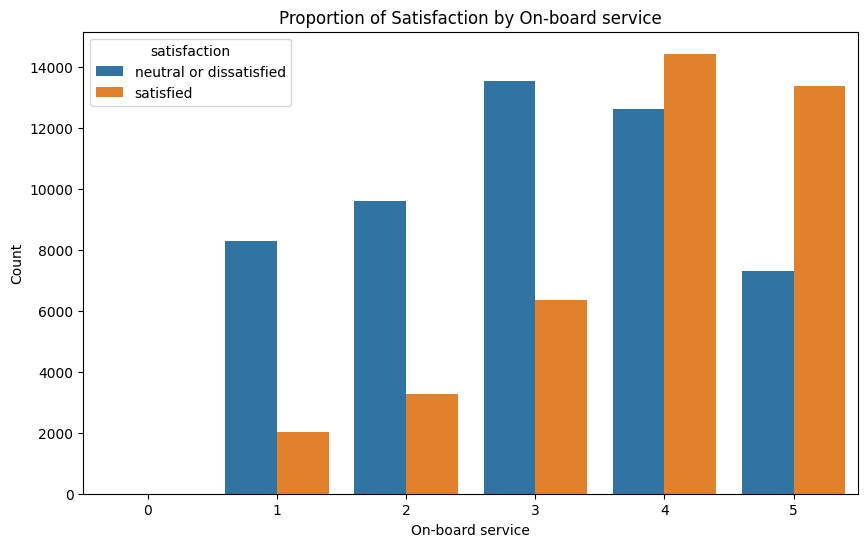

In [64]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('On-board service')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('On-board service')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='On-board service', hue='satisfaction')
plt.title('Proportion of Satisfaction by On-board service')
plt.ylabel('Count')
plt.xlabel('On-board service')
plt.show()

In [65]:
# Perform the independence test
independence_test('Inflight entertainment')

Satisfaction and Inflight entertainment is not independent with P-val=0.00.


### Predictor 15:  Leg room service
---
The feature of Leg room service

In [66]:
# Describe proportion of 'data_train.info()'
data_train['Leg room service'].value_counts(normalize=True)

Leg room service
4    0.276783
5    0.238990
3    0.191594
2    0.189384
1    0.098652
0    0.004598
Name: proportion, dtype: float64

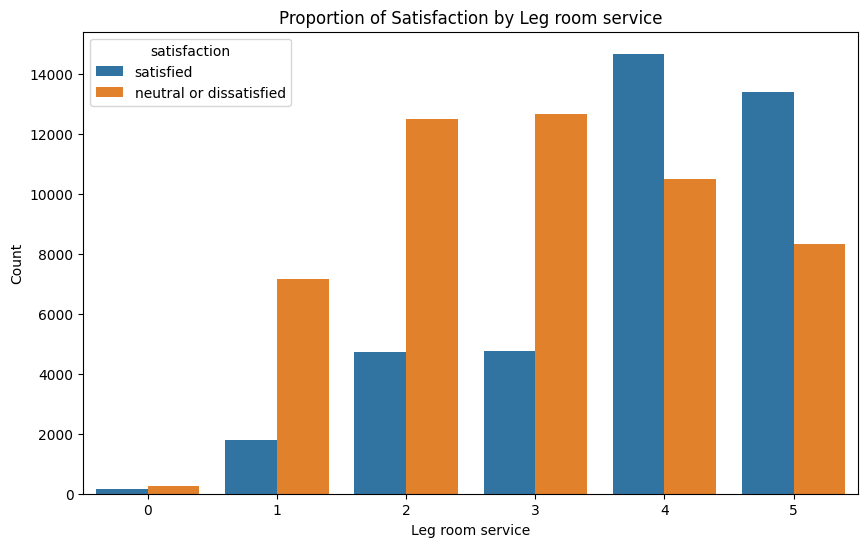

In [67]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Leg room service')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Leg room service')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Leg room service', hue='satisfaction')
plt.title('Proportion of Satisfaction by Leg room service')
plt.ylabel('Count')
plt.xlabel('Leg room service')
plt.show()

In [68]:
# Perform the independence test
independence_test('Leg room service')

Satisfaction and Leg room service is not independent with P-val=0.00.


### Predictor 16:  Baggage handling
---
The feature of Baggage handling

In [69]:
# Describe proportion of 'data_train.info()'
data_train['Baggage handling'].value_counts(normalize=True)

Baggage handling
4    0.359464
5    0.261472
3    0.199624
2    0.110036
1    0.069405
Name: proportion, dtype: float64

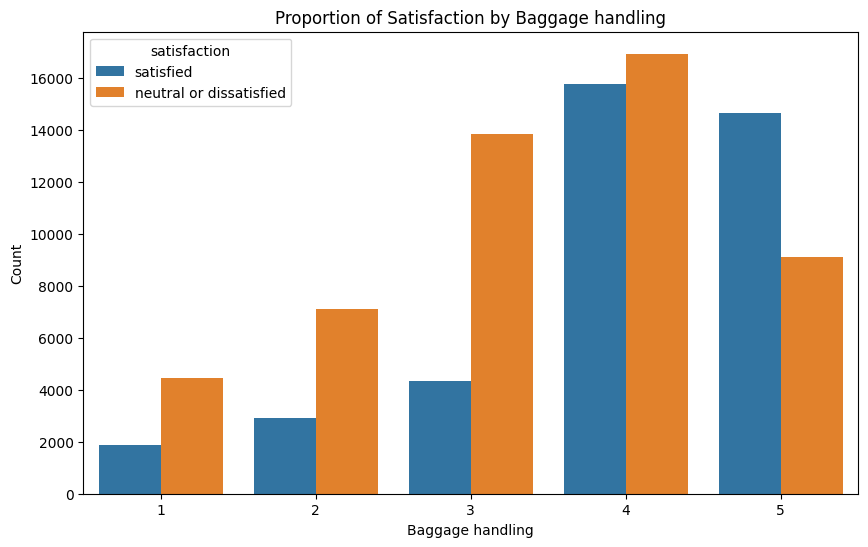

In [70]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Baggage handling')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Baggage handling')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Baggage handling', hue='satisfaction')
plt.title('Proportion of Satisfaction by Baggage handling')
plt.ylabel('Count')
plt.xlabel('Baggage handling')
plt.show()

In [71]:
# Perform the independence test
independence_test('Baggage handling')

Satisfaction and Baggage handling is not independent with P-val=0.00.


### Predictor 17:  Checkin service
---
The feature of Checkin service

In [72]:
# Describe proportion of 'data_train.info()'
data_train['Checkin service'].value_counts(normalize=True)

Checkin service
4    0.280435
3    0.274143
5    0.198788
1    0.123917
2    0.122718
Name: proportion, dtype: float64

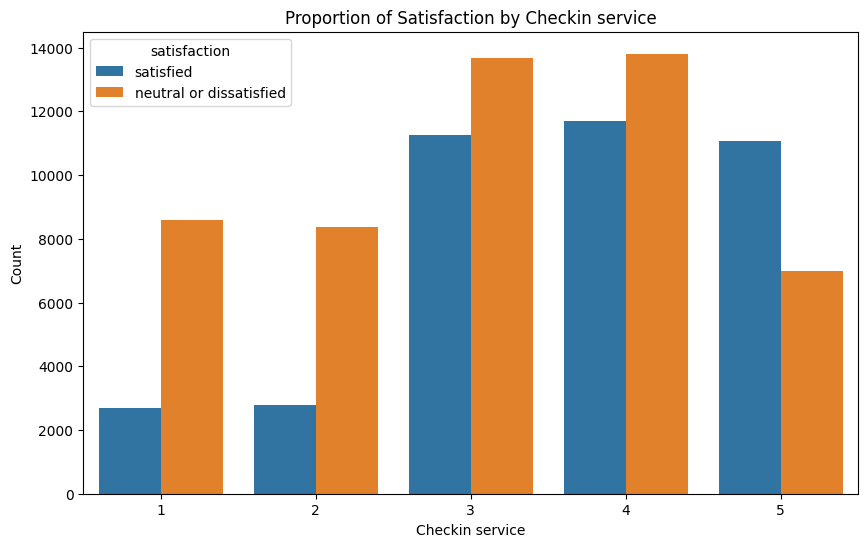

In [73]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Checkin service')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Checkin service')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Checkin service', hue='satisfaction')
plt.title('Proportion of Satisfaction by Checkin service')
plt.ylabel('Count')
plt.xlabel('Checkin service')
plt.show()

In [74]:
# Perform the independence test
independence_test('Checkin service')

Satisfaction and Checkin service is not independent with P-val=0.00.


### Predictor 18:  Inflight service
---
The feature of Inflight service

In [75]:
# Describe proportion of 'data_train.info()'
data_train['Inflight service'].value_counts(normalize=True)

Inflight service
4    0.364017
5    0.262891
3    0.194685
2    0.110564
1    0.067821
0    0.000022
Name: proportion, dtype: float64

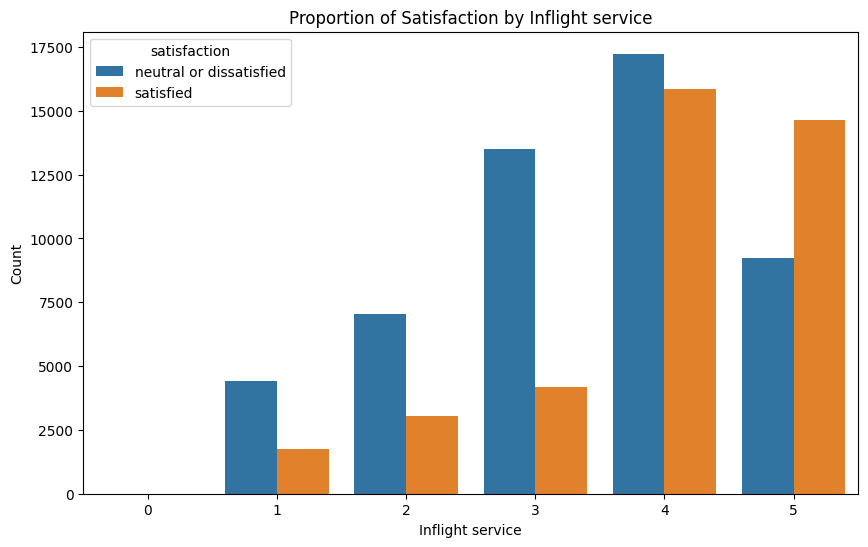

In [76]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Inflight service')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Inflight service')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Inflight service', hue='satisfaction')
plt.title('Proportion of Satisfaction by Inflight service')
plt.ylabel('Count')
plt.xlabel('Inflight service')
plt.show()

In [77]:
# Perform the independence test
independence_test('Inflight service')

Satisfaction and Inflight service is not independent with P-val=0.00.


### Predictor 19:  Cleanliness
---
The feature of Cleanliness

In [78]:
# Describe proportion of 'data_train.info()'
data_train['Cleanliness'].value_counts(normalize=True)

Cleanliness
4    0.261604
3    0.235734
5    0.219246
2    0.155308
1    0.127986
0    0.000121
Name: proportion, dtype: float64

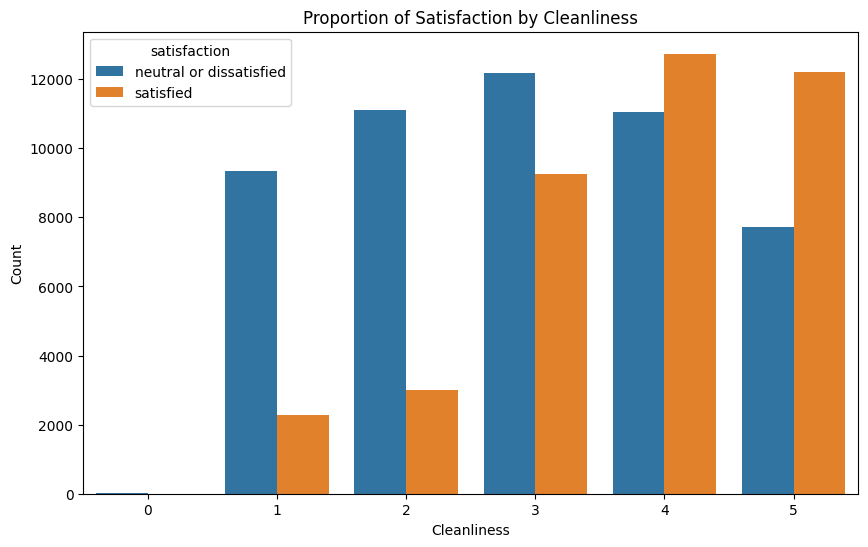

In [79]:
# Describe proportion of satifaction by Inflight entertainment
data_train.groupby('Cleanliness')['satisfaction'].value_counts(normalize=True)
# Describe proportion of satisfaction by gender
proportion_by_gender = data_train.groupby('Cleanliness')['satisfaction'].value_counts(normalize=True).unstack()

# Plot with countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Cleanliness', hue='satisfaction')
plt.title('Proportion of Satisfaction by Cleanliness')
plt.ylabel('Count')
plt.xlabel('Cleanliness')
plt.show()

In [80]:
# Perform the independence test
independence_test('Cleanliness')

Satisfaction and Cleanliness is not independent with P-val=0.00.


### Predictor 20:  Departure Delay in Minutes
---
The feature of Departure Delay in Minutes

In [81]:
# Descriptive statistics of age
data_train['Departure Delay in Minutes'].describe()

count    90916.000000
mean        14.807493
std         38.211088
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

- The minumum distance is 31 and maximum is 4983
- The mea distance is 845

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

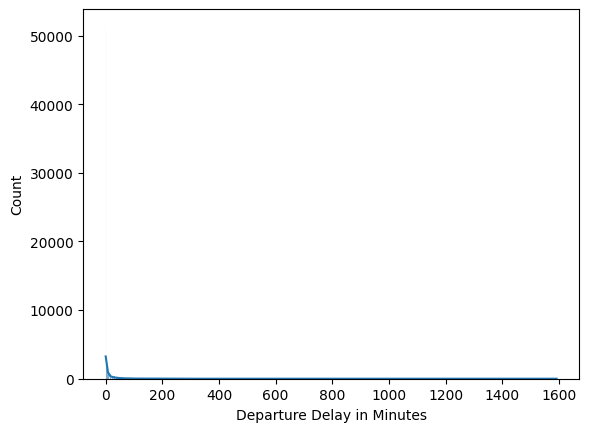

In [82]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'Departure Delay in Minutes',
             kde = True)

In [83]:
# Descriptive of age by response stroke
data_train['Departure Delay in Minutes'].groupby(data_train['satisfaction']).describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,51416.0,16.494554,40.280602,0.0,0.0,0.0,15.0,1592.0
satisfied,39500.0,12.611494,35.215800,0.0,0.0,0.0,9.0,1305.0


<Axes: xlabel='satisfaction', ylabel='Departure Delay in Minutes'>

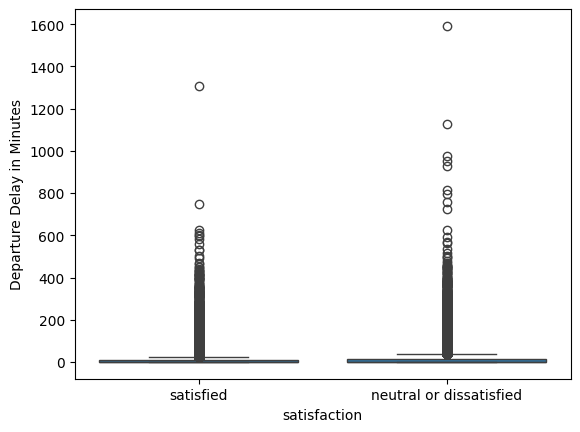

In [84]:
# Boxplot of age by response stroke
sns.boxplot(data = data_train,
            x = 'satisfaction',
            y = 'Departure Delay in Minutes')

In [ ]:
# Check for the perfect separation
sns.scatterplot(data=data_train,
                x='Departure Delay in Minutes',
                y='satisfaction',
                hue='satisfaction')
plt.title('Scatter Plot of Departure Delay in Minutes vs Satisfaction')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Satisfaction')
plt.show()

In [88]:
# Perform the independence test
independence_test('Departure Delay in Minutes')

Satisfaction and Departure Delay in Minutes is not independent with P-val=0.00.


### Predictor 21:  Arrival Delay in Minutes
---
The feature of Arrival Delay in Minutes

In [89]:
# Descriptive statistics of age
data_train['Arrival Delay in Minutes'].describe()

count    90623.000000
mean        15.173058
std         38.557684
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

- The minumum distance is 31 and maximum is 4983
- The mea distance is 845

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

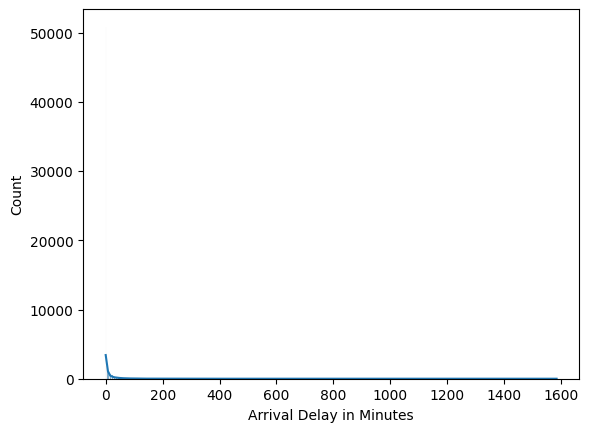

In [90]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'Arrival Delay in Minutes',
             kde = True)

In [91]:
# Descriptive of age by response stroke
data_train['Arrival Delay in Minutes'].groupby(data_train['satisfaction']).describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
neutral or dissatisfied,51246.0,17.139757,40.583462,0.0,0.0,0.0,17.0,1584.0
satisfied,39377.0,12.613556,35.587914,0.0,0.0,0.0,8.0,1280.0


<Axes: xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

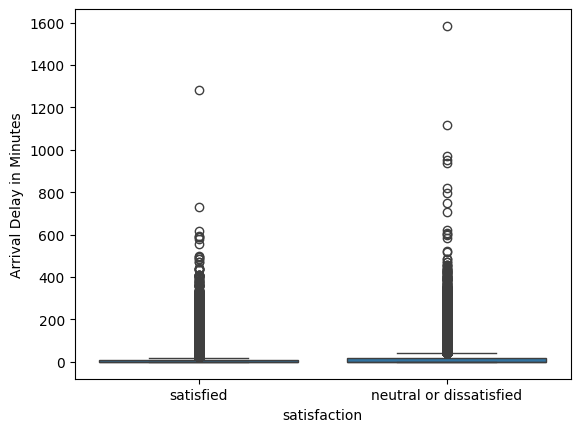

In [92]:
# Boxplot of age by response stroke
sns.boxplot(data = data_train,
            x = 'satisfaction',
            y = 'Arrival Delay in Minutes')

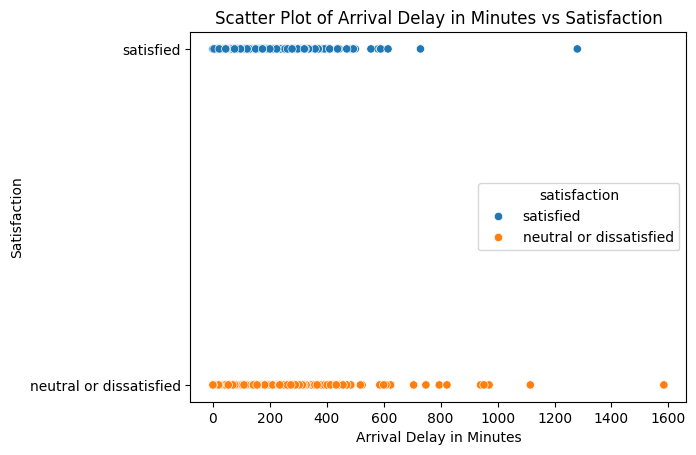

In [93]:
# Check for the perfect separation
sns.scatterplot(data=data_train,
                x='Arrival Delay in Minutes',
                y='satisfaction',
                hue='satisfaction')
plt.title('Scatter Plot of Arrival Delay in Minutes vs Satisfaction')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Satisfaction')
plt.show()

In [94]:
# Perform the independence test
independence_test('Arrival Delay in Minutes')

Satisfaction and Arrival Delay in Minutes is not independent with P-val=0.00.


## **4. Pre-processing Training Set**
---

### Impute Missing Values
---

From EDA, we know some of our variables have missing values.

#### Check for missing values

In [95]:
data_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             293
satisfaction                           0
dtype: int64

<center>

|Predictors|Imputation Strategy|
|:--|:--|
|`Arrival Delay in Minutes`|`median`|

</center>

First, create an imputer function to impute missing values from:
- numerical variable, `Arrival Delay in Minutes`, and

In [96]:
# We use sklearn imputer
from sklearn.impute import SimpleImputer

In [97]:
# Create a function to impute missing values with median
def fit_median_imputer(data, cols):
    '''Create imputer with median. Note: create imputer from data train only'''
    # Create imputer
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'median')

    # Fit imputer
    imputer.fit(data[cols])

    return imputer

# Create a function to impute missing values with mode
def fit_mode_imputer(data, cols):
    '''Create imputer with mode. Note: create imputer from data train only'''
    # Create imputer
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

    # Fit imputer
    imputer.fit(data[cols])

    return imputer

In [98]:
# Create transform data from imputer
def transform_imputer(data, cols, imputer):
    '''Transform data train/data test with numerical imputer'''
    data = data.copy()

    # Filter numerical data
    num_data = data[cols]

    # Transform imputer
    num_data_imputed = imputer.transform(num_data)

    # Replace the original data with imputed data
    data[cols] = num_data_imputed

    return data

Next, perform the imputation.

In [99]:
# First, fit the imputer
median_imputer = fit_median_imputer(data = data_train,
                                    cols = ['Arrival Delay in Minutes'])

In [100]:
data_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             293
satisfaction                           0
dtype: int64

In [101]:
# Then perform imputation. Imputation pipeline:
# 1.
data_imputed = transform_imputer(data = data_train,
                                 cols = ['Arrival Delay in Minutes'],
                                 imputer = median_imputer)

Check the results.

In [102]:
data_imputed.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Make Dummies
---

In [103]:
# Table check
data_imputed.head().T

,27875,38437,120302,46094,56431
Gender,Male,Female,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,40,29,45,52,53
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Business,Business,Business,Business,Business
Flight Distance,3292,2389,1276,2150,3310
Inflight wifi service,5,5,2,5,1
Departure/Arrival time convenient,5,4,2,5,1
Ease of Online booking,5,5,2,5,1
Gate location,5,5,3,5,1


In [104]:
# Create dummy variables for gender (1: Male, 0: Female)
data_imputed[['Male']] = pd.get_dummies(data_imputed['Gender'],
                                      drop_first = True)

In [105]:
# Create dummy variables for gender (1: Male, 0: Female)
data_imputed[['Loyal Customer']] = pd.get_dummies(data_imputed['Customer Type'],
                                      drop_first = True)

In [106]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_imputed[['Business travel']] = pd.get_dummies(data_imputed['Type of Travel'],
                                         drop_first = True)

In [107]:
data_imputed['Class'].unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [108]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_imputed[['Business', 'Eco']] = pd.get_dummies(data_imputed['Class'],
                                         drop_first = True)

### Data Balancing
---

In [109]:
# Check training set
print('data_train old shape:', data_imputed.shape)

data_train old shape: (90916, 28)


In [110]:
# Check the counts of response variable
data_train[response_variable].value_counts()

satisfaction
neutral or dissatisfied    51416
satisfied                  39500
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

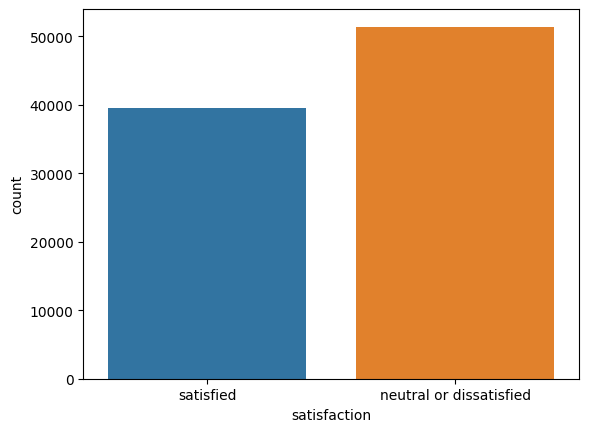

In [111]:
# Check the proportion before RUS
sns.countplot(data = data_imputed,
              x = response_variable,
              hue = response_variable,
              dodge = False)

## **5. Pre-processing Testing Set**
---

First, we process the test data according to the pre-processing pipeline in train data.

In [112]:
# Concatenate X_test and y_test as data_test
data_test = pd.concat((X_test, y_test), axis=1)

# Validate data_test
print('Test data shape:', data_test.shape)

Test data shape: (38964, 23)


In [113]:
# Table check
data_test.head().T

,93233,5115,120531,52022,49618
Gender,Male,Male,Male,Female,Female
Customer Type,disloyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,22,60,26,33,30
Type of Travel,Business travel,Personal Travel,Business travel,Business travel,Personal Travel
Class,Business,Eco Plus,Business,Business,Eco Plus
Flight Distance,214,404,226,2997,1290
Inflight wifi service,5,3,3,2,2
Departure/Arrival time convenient,0,5,0,3,5
Ease of Online booking,5,3,3,2,3
Gate location,4,1,2,2,2


###### 2. Impute Missing Values

In [114]:
# Check for missing values
data_test.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             100
satisfaction                           0
dtype: int64

In [115]:
# Then perform imputation. Imputation pipeline:
# 1. impute `bmi` with median
# 2. impute `smoking_status` with mode

# 1.
data_test_imputed = transform_imputer(data = data_test,
                                      cols = ['Arrival Delay in Minutes'],
                                      imputer = median_imputer)

In [116]:
data_test_imputed.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [117]:
# Create dummy variables for gender (1: Male, 0: Female)
data_test_imputed[['Male']] = pd.get_dummies(data_test_imputed['Gender'],
                                           drop_first = True)

In [118]:
# Create dummy variables for gender (1: Male, 0: Female)
data_test_imputed[['Loyal Customer']] = pd.get_dummies(data_test_imputed['Customer Type'],
                                           drop_first = True)

In [ ]:
data_imputed

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,Loyal Customer,Business travel,Business,Eco
27875,Male,Loyal Customer,40,Business travel,Business,3292,5,5,5,5,...,4,3,0,0.0,satisfied,True,False,False,False,False
38437,Female,Loyal Customer,29,Business travel,Business,2389,5,4,5,5,...,5,5,9,0.0,satisfied,False,False,False,False,False
120302,Female,disloyal Customer,45,Business travel,Business,1276,2,2,2,3,...,4,5,8,0.0,neutral or dissatisfied,False,True,False,False,False
46094,Male,Loyal Customer,52,Business travel,Business,2150,5,5,5,5,...,5,3,46,42.0,satisfied,True,False,False,False,False
56431,Female,Loyal Customer,53,Business travel,Business,3310,1,1,1,1,...,5,4,1,0.0,satisfied,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120752,Female,Loyal Customer,49,Business travel,Business,1072,2,2,4,2,...,4,4,11,4.0,satisfied,False,False,False,False,False
10445,Female,Loyal Customer,55,Personal Travel,Eco,109,2,5,0,5,...,4,4,0,0.0,neutral or dissatisfied,False,False,True,True,False
111587,Male,Loyal Customer,30,Business travel,Business,2525,0,0,0,2,...,5,4,14,22.0,satisfied,True,False,False,False,False
58592,Female,Loyal Customer,44,Business travel,Business,1440,5,5,5,5,...,4,4,51,45.0,satisfied,False,False,False,False,False


In [119]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_test_imputed[['Business travel']] = pd.get_dummies(data_test_imputed['Type of Travel'],
                                         drop_first = True)

In [120]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_test_imputed[['Business', 'Eco']] = pd.get_dummies(data_test_imputed['Class'],
                                         drop_first = True)

In [142]:
data_test_imputed.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], inplace=True)

In [121]:
# Split response and predictors
y_test = data_test_imputed[response_variable]
X_test = data_test_imputed.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Validate the splitting
print('y_test shape :', y_test.shape)
print('X_test shape :', X_test.shape)

y_test shape : (38964,)
X_test shape : (38964, 27)


We are ready to evaluate the best model on `X_test`.

## **6. Model Selection**
---

Next, we will perform variable selection to decide which predictor variables give the optimum model estimation fit.

We call that optimum model as the best model from the variable selection.

- We will use the **Forward Selection** procedure since we have relatively many predictors.
- We use the **AIC** value to choose the best model, in which the model with the smallest AIC is the best model.
- To find the valid AIC value from each possible model, we use **5-Fold Cross-Validation** to calculate the AIC score.

We will perform model selection to find the best model from each training set:
1. The original training set
2. The original training set using `class_weight`
3. Random undersampling training set
4. Random oversampling training set

### Load Functions for Model Selection
---

AIC, KFold, and Forward Selection

In [122]:
def AIC(y_true, y_pred, p):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    y_true : {array-like} of shape (n_sample, )
        Actual value of response variable.

    y_pred : {array-like} of shape (n_sample, 1)
        The success probability of X.

    p : int
        Number of parameters in model.

    Returns
    -------
    aic : float
        AIC value.
    """
    # Find the average log likelihood value
    llf = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

    # AIC value is sensitive to number of parameters
    # The average log likelihood represent value for 1 unit observation
    # AIC from average llf is not comparable
    # Multiply llf by n_sample of training set to make its AIC comparable
    llf *= data_clean.shape[0]

    # Calculate AIC
    aic = -2 * (llf - p)

    return aic


In [123]:
def kfold_split(X, k=5, random_state=42):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    k : int, default = 5
        Number of folds.

    random_state : int
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    train_ind_list : list
        Contains data index of train set.

    valid_ind_list : list
        Contains data index of validation set.
    """
    # Extract sample size
    n_samples, _ = X.shape

    # Set random state
    np.random.seed(random_state)

    # # Randomize index
    random_ind = np.random.choice(n_samples,
                                  size = n_samples,
                                  replace = False)

    # Calculate size of each fold
    fold_sizes = np.ones(k, dtype=int) * (n_samples//k)
    fold_sizes[:n_samples%k] += 1

    # Define initial list for each train and valid index
    train_ind_list = []
    valid_ind_list = []

    # Split sample
    current_ind = 0
    for size in fold_sizes:
        # Define index
        start_ind = current_ind
        end_ind = current_ind + size

        # Slice valid set
        # One fold for valid set, the remaining for train set
        valid_ind = random_ind[start_ind:end_ind]
        train_ind = np.concatenate((random_ind[:start_ind],
                                    random_ind[end_ind:]))

        # Update current index
        current_ind = end_ind

        # Append train and valid index in list
        train_ind_list.append(train_ind)
        valid_ind_list.append(valid_ind)

    return train_ind_list, valid_ind_list


In [124]:
def cross_validate(X, y, method, cv, class_weight=None, random_state=42):
    """
    Function to evaluate AIC by cross-validation method.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictors.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    method : cross-validation splitter
        Cross-validation method.

    cv : int
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    score : float
        The average AIC score.
    """
    # Split train and valid set based on CV method
    if method == "validation_set":
        train_ind_list, valid_ind_list = validation_set_split(X = X,
                                                              random_state = random_state)
    elif method == "loocv":
        train_ind_list, valid_ind_list = loocv_split(X = X)
    elif method == "kfold":
        train_ind_list, valid_ind_list = kfold_split(X = X,
                                                     k = cv,
                                                     random_state = random_state)

    # Define the number of train sets
    n_split = len(train_ind_list)

    # Initialize AIC score list for each valid set
    score_list = []

    for i in range(n_split):
        # Extract data from index
        X_train = X[train_ind_list[i]]
        y_train = y[train_ind_list[i]]
        X_valid = X[valid_ind_list[i]]
        y_valid = y[valid_ind_list[i]]

        # Fitting model
        model = LogisticRegression(penalty = None,
                                   class_weight = class_weight)
        model.fit(X_train, y_train)

        # Calculate success probability
        pred_train = model.predict_proba(X_train)
        pred_valid = model.predict_proba(X_valid)

        y_pred_train = pred_train[:,1]
        y_pred_valid = pred_valid[:,1]

        # Calculate AIC
        aic_train = AIC(y_true = y_train,
                        y_pred = y_pred_train,
                        p = X_train.shape[1]+1)
        aic_valid = AIC(y_true = y_valid,
                        y_pred = y_pred_valid,
                        p = X_train.shape[1]+1)

        # Append AIC score in list
        score_list.append(aic_valid)

    # Calculate CV Score
    score = np.mean(score_list)

    return score


In [125]:
def forward(X, y, predictors, method, cv=5, class_weight=None, random_state=42):
    """
    Function to perform best subset selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
        Index of predictors

    method : cross-validation splitter
        Cross-validation method.

    cv : int, default=5
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
        Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
        Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Cross validate to get CV Score
        score_ = cross_validate(X = X_,
                                y = y_,
                                method = method,
                                cv = cv,
                                class_weight = class_weight,
                                random_state = random_state)

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                            "AIC": score_list})

    # Choose the best model
    best_model = models.loc[models["AIC"].argmin()]

    return models, best_model


We are ready to perform the Forward Selection procedure.

- Begin with fitting the null model.
- Then perform the Forward Selection procedure by adding one predictor that make the smallest AIC score, one-at-a-time.
- Therefore, from `X_train` containing 13 predictors, we will have 13 best models from each possible number of predictors in model.

### **1. The Original Training Set**
---

In [126]:
# Split response and predictors
y_train = data_imputed[response_variable]
X_train = data_imputed.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Validate
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (90916, 27)
y_train shape: (90916,)


Fit the null (constant) model.

In [133]:
X_train[1]

array(['Female', 'Loyal Customer', 29, 'Business travel', 'Business',
       2389, 5, 4, 5, 5, 5, 5, 5, 5, 3, 3, 4, 5, 5, 5, 9, 0.0, False,
       False, False, False, False], dtype=object)

In [127]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train[:, [1]],
                        y = y_train,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "AIC": [score_]})

forward_models

ValueError: could not convert string to float: 'Loyal Customer'

In [130]:
X_train[:, [1]]

array([['Loyal Customer'],
       ['Loyal Customer'],
       ['disloyal Customer'],
       ...,
       ['Loyal Customer'],
       ['Loyal Customer'],
       ['Loyal Customer']], shape=(90916, 1), dtype=object)